In [ ]:
import cv2
import glob as glob
from google.colab import drive
drive.mount('/content/drive')
images=[cv2.imread(img) for img in glob.glob(file path)]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


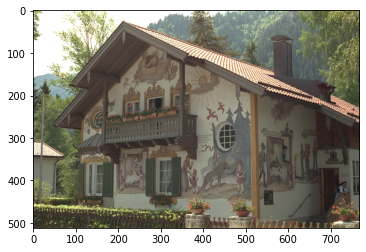

In [ ]:
for index,i in enumerate(images):
  images[index]=cv2.cvtColor(i,cv2.COLOR_BGR2RGB)
import matplotlib.pyplot as plt
%matplotlib inline 
plt.imshow(images[23])
m=images[23].shape[0]
n=images[23].shape[1]
p=images[23].shape[2]

In [ ]:
red=[[1,0],[0,0]]
blue=[[0,0],[0,1]]
green=[[0,1],[1,0]] 

In [ ]:
import numpy.matlib
import numpy as np
from math import ceil
red=np.matlib.repmat(red,ceil(m/2),ceil(n/2))
green=np.matlib.repmat(green,ceil(m/2),ceil(n/2))
blue=np.matlib.repmat(blue,ceil(m/2),ceil(n/2))

In [ ]:
red_channel=red*images[23][:,:,0]
green_channel=green*images[23][:,:,1]
blue_channel=blue*images[23][:,:,2]
output=red_channel+green_channel+blue_channel


In [ ]:
from scipy.signal import convolve2d
filter1=[[0,0.25,0],[0.25,1,0.25],[0,0.25,0]]
green_filter=convolve2d(green_channel,filter1,mode="same")
filter2=[[0.25,0.5,0.25],[0.5,1,0.5],[0.25,0.5,0.25]]
red_filter1=convolve2d(red_channel,filter2,mode="same")
blue_filter1=convolve2d(blue_channel,filter2,mode="same")

In [ ]:
out=np.zeros((m,n,p))
out[:,:,0]=red_filter1
out[:,:,1]=green_filter
out[:,:,2]=blue_filter1

In [ ]:
Vrg=red_filter1-green_filter
Vgb=green_filter-blue_filter1
Vrb=red_filter1-blue_filter1

In [ ]:
mrg=np.zeros((m,n))
for i in range(1,m-2):
  for j in range(1,n-2):
     mrg[i][j]=mrg[i][j]+np.median(Vrg[i-1:i+2,j-1:j+2])

In [ ]:
mrb=np.zeros((m,n))
for i in range(1,m-2):
  for j in range(1,n-2):
    mrb[i][j]=mrb[i][j]+np.median(Vrb[i-1:i+2,j-1:j+2])

In [ ]:
mgb=np.zeros((m,n))
for i in range(1,m-2):
  for j in range(1,n-2):
    mgb[i][j]=mgb[i][j]+np.median(Vgb[i-1:i+2,j-1:j+2])

In [ ]:

final_green1=red_channel-mrg
final_blue1=red_channel-mrb


In [ ]:

final_red2=green_channel+mrg
final_blue2=green_channel-mgb

In [ ]:

final_red3=blue_channel+mrb
final_green3=blue_channel+mgb

In [ ]:
red=red_channel+final_red2+final_red3
green=green_channel+final_green1+final_green3
blue=final_blue2+final_blue1+blue_channel

In [ ]:
out2=np.zeros((m,n,p))
out2[:,:,0]=red
out2[:,:,1]=green
out2[:,:,2]=blue
